In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import *
import math
import os
import time
from skimage.io import imread
from skimage import img_as_float

In [230]:
image = imread('Владка.jpg')

In [231]:
data = img_as_float(image)

In [232]:
data = np.array([data[:,:,0], data[:,:,1], data[:,:,2]])
scaler = []

for arr in data:
    
    m = preprocessing.StandardScaler()
    arr = m.fit_transform(arr)
    scaler.append(m)

In [233]:
result = []

for n in range(1, 52):

    pca = decomposition.PCA(n_components = n, svd_solver = 'full')
    
    sklearn_reconst_r = pca.inverse_transform(pca.fit_transform(data[0]))
    sklearn_reconst_g = pca.inverse_transform(pca.fit_transform(data[1]))
    sklearn_reconst_b = pca.inverse_transform(pca.fit_transform(data[2]))
    
    arr = np.array([sklearn_reconst_r/np.max(sklearn_reconst_r)*np.max(data[0]),
                    sklearn_reconst_g/np.max(sklearn_reconst_g)*np.max(data[1]),
                    sklearn_reconst_b/np.max(sklearn_reconst_b)*np.max(data[2])])
    
    arr = np.swapaxes(arr, 0, 1)
    arr = np.swapaxes(arr, 1, 2)
    
    result.append(arr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

IndexError: list index out of range

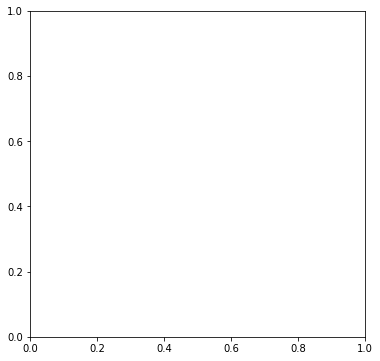

In [234]:
os.makedirs('Компоненты Владки', exist_ok = True)

for i in range(1, 52):
    
    fig, ax = plt.subplots(figsize = (6, 6))
    ax.imshow(result[i])
    plt.savefig('Компоненты Владки\{} components.jpg'.format(i), format = 'jpg', dpi = 300)
    plt.close(fig)
    

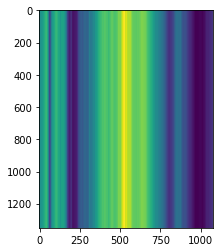

In [193]:
plt.imshow(result[0][:,:,0])

In [159]:
np.linalg.matrix_rank(result[0][:,:2,0])

1

In [227]:
model = decomposition.PCA(n_components = 10, svd_solver = 'full')
shit = model.fit_transform(data[0])

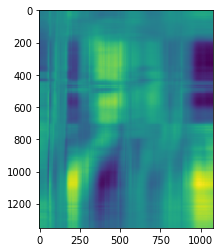

In [228]:
plt.imshow(shit@shit.T@data[0])

In [229]:
(shit@shit.T@data[0])[(570,1010),:]

array([[  690.17532711,   652.89967734,   624.95679753, ...,
        -8700.13801756, -8703.42551416, -8747.08430132],
       [ -464.55530127,  -428.64750831,  -392.53025682, ...,
         7252.77167043,  7263.20267259,  7318.00075519]])

In [2]:
a = np.random.randn(4, 3) # a.shape = (4, 3)
b = np.random.randn(3, 2) # b.shape = (3, 2)
c = a*b

ValueError: operands could not be broadcast together with shapes (4,3) (3,2) 